In [2]:
# Data manipulation
import pandas as pd
import numpy as np

import time
import datetime
from itertools import count

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply

plotly.offline.init_notebook_mode(connected=True)

import cufflinks as cf

cf.go_offline(connected=True)
cf.set_config_file(theme="white")

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Autoreload extension
if "autoreload" not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
# nb_black extension
if "nb_black" not in get_ipython().extension_manager.loaded:
    %load_ext nb_black

%autoreload 2

<IPython.core.display.Javascript object>

In [19]:
data = pd.read_csv("DHT22_data.csv")
data["Datetime"] = pd.to_datetime(data["Datetime"])

<IPython.core.display.Javascript object>

In [20]:
def animate():
    # The pd dataframe is passed by reference
    current_time = datetime.datetime.now()
    new_temp = np.random.normal(24, 1)
    new_humidity = np.random.normal(66, 1)
    data.loc[len(data)] = [current_time, new_temp, new_humidity]
    Datetime[len(Datetime)] = current_time
    Temperature[len[Temperature]] = new_temp
    Humidity[len[Humidity]] = new_humidity

    #     ax.clear()
    plt.plot(Datetime, Humidity)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


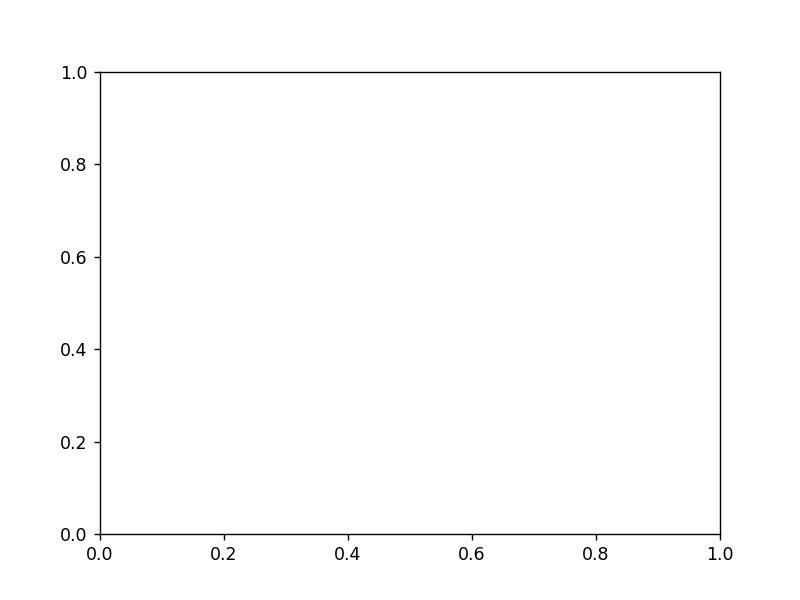

<IPython.core.display.Javascript object>

In [21]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# sns.lineplot(data=data, x="Datetime", y="Humidity")
# plt.plot(data["Datetime"], data["Humidity"])
Datetime = data["Datetime"]
Temperature = data["Temperature"]
Humidity = data["Humidity"]

anim = animation.FuncAnimation(fig, animate, interval=0.5)
plt.show()

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0, 2 * np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
(l,) = ax.plot([0, 2 * np.pi], [-1, 1])

animate = lambda i: l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>